# 1. Зниження розмірності та візуалізація

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
raw_data = pd.read_csv('heart.csv')
print(raw_data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
columns = raw_data.columns
x = raw_data.loc[:, columns].values
y = raw_data.loc[:,['output']].values

# 1.1 PCA

In [4]:
x_std = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_raw_data = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])
final_pca_raw_data = pd.concat([pca_raw_data, raw_data[['output']]], axis = 1)
print(final_pca_raw_data)

          PCA 1      PCA 2  output
0    -12.267726   2.870002       1
1      2.689662 -39.873863       1
2    -42.950640 -23.639530       1
3    -10.945206 -28.441101       1
4    106.978583 -15.879436       1
..          ...        ...     ...
298   -4.553591  27.494199       0
299   16.428494  12.925387       0
300  -51.963290  13.329155       0
301 -114.755392  36.439808       0
302  -10.395712 -23.296238       0

[303 rows x 3 columns]


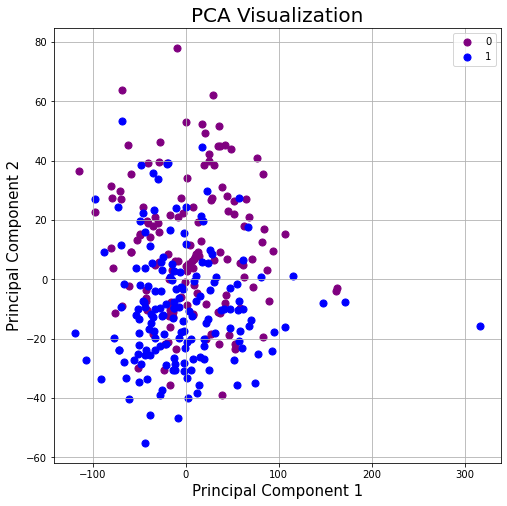

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Visualization', fontsize = 20)
targets = [0,1]
colors = ['purple', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = final_pca_raw_data['output'] == target
    ax.scatter(final_pca_raw_data.loc[indicesToKeep, 'PCA 1'], final_pca_raw_data.loc[indicesToKeep, 'PCA 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

# 1.2 t-SNE

In [6]:
x_std2 = StandardScaler().fit_transform(x)
tsne = TSNE(n_components=2, perplexity=40, n_iter=500, learning_rate = 200)
stochastic_neighbor = tsne.fit_transform(x_std2) 
stochastic_neighbor_raw_data = pd.DataFrame(data = stochastic_neighbor, columns = ['tsne1', 'tsne2'])
final_stochastic_neighbor_raw_data = pd.concat([stochastic_neighbor_raw_data, raw_data[['output']]], axis = 1)
print(final_stochastic_neighbor_raw_data)

         tsne1      tsne2  output
0     4.782617 -10.673551       1
1     1.819111  -6.012379       1
2    -7.969507   2.018332       1
3    -4.667944  -3.036261       1
4   -11.913513   4.005793       1
..         ...        ...     ...
298  13.016286  -2.711279       0
299   2.024677  -2.976294       0
300   9.082618  -5.768254       0
301   9.055700  -0.237275       0
302  -6.539284   3.337729       0

[303 rows x 3 columns]


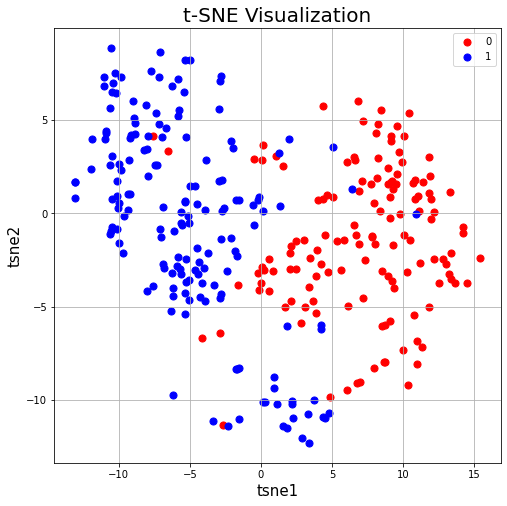

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne1', fontsize = 15)
ax.set_ylabel('tsne2', fontsize = 15)
ax.set_title('t-SNE Visualization', fontsize = 20)
targets1 = [0,1]
colors = ['red', 'blue']
for target, color in zip(targets1,colors):
    indicesToKeep = final_stochastic_neighbor_raw_data['output'] == target
    ax.scatter(final_stochastic_neighbor_raw_data.loc[indicesToKeep, 'tsne1'], final_stochastic_neighbor_raw_data.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
ax.legend(targets1)
ax.grid()
plt.show()

# 2. Кластерний аналіз

# 2.1 Квантування зображення за допомогою k-means

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

In [9]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [10]:
brist = Image.open('brist.jpg')
brist = np.array(brist, dtype=np.float64)/255

In [11]:
w, h, d = original_shape = tuple(brist.shape)
assert d == 3
image_array = np.reshape(brist, (w * h, d))

In [12]:
n_colors = [64,32,16,8]

models = []
for i in n_colors:  
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=i).fit(image_array_sample)
    models.append(kmeans)

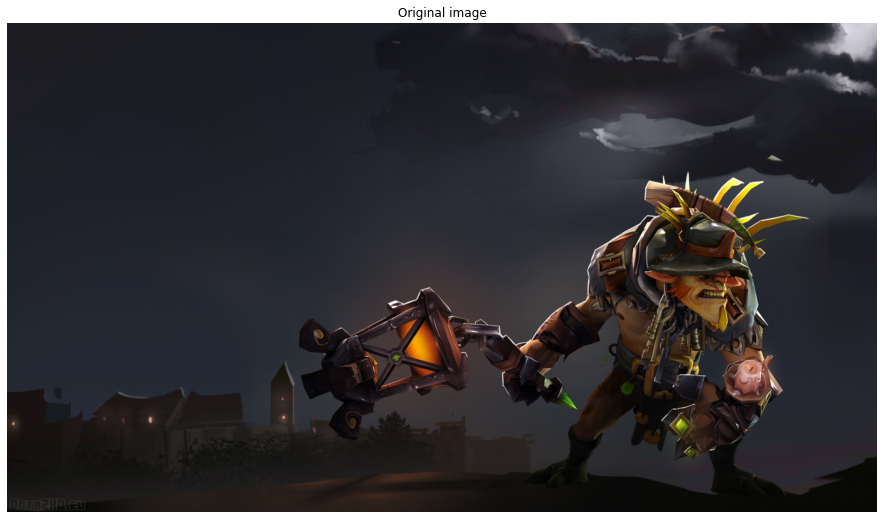

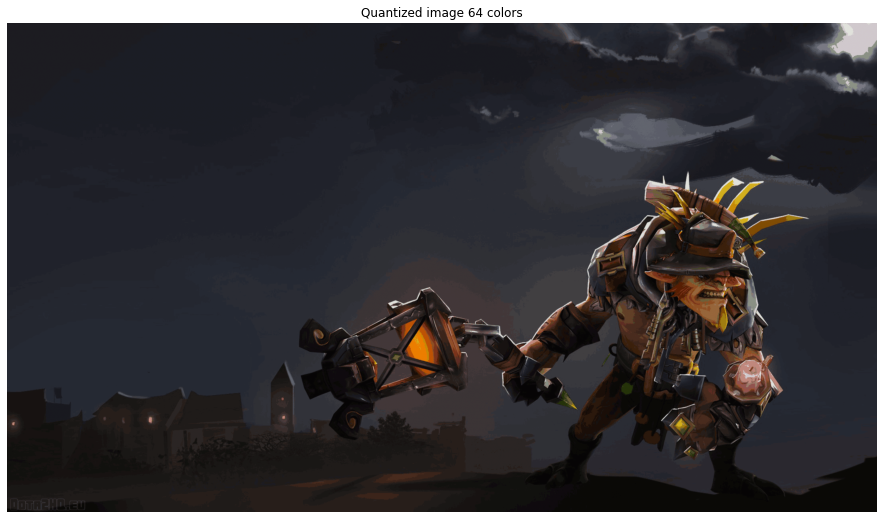

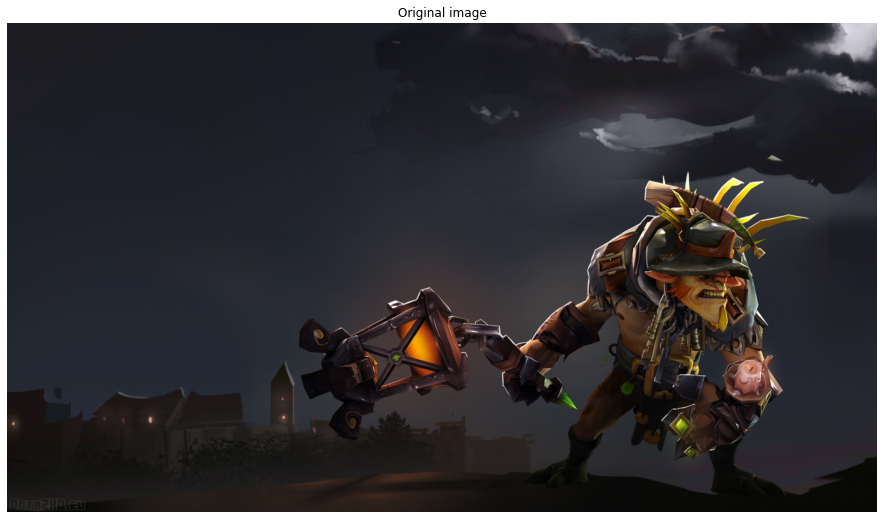

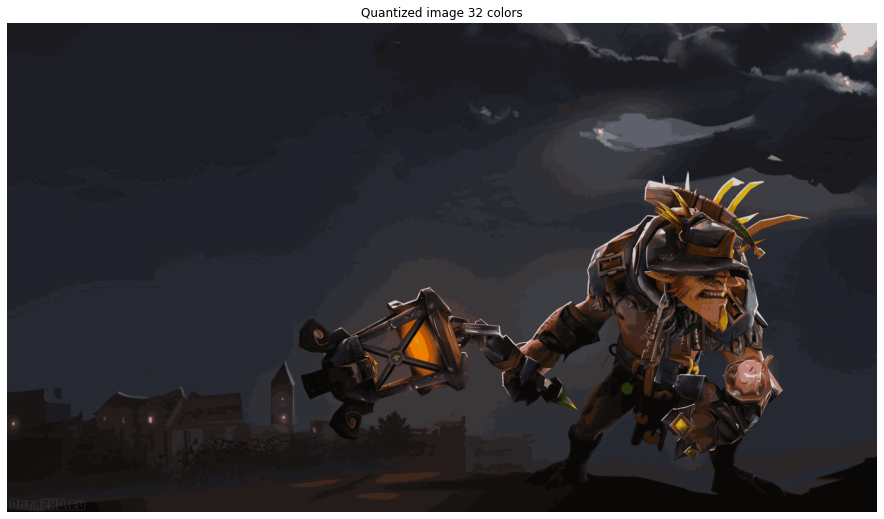

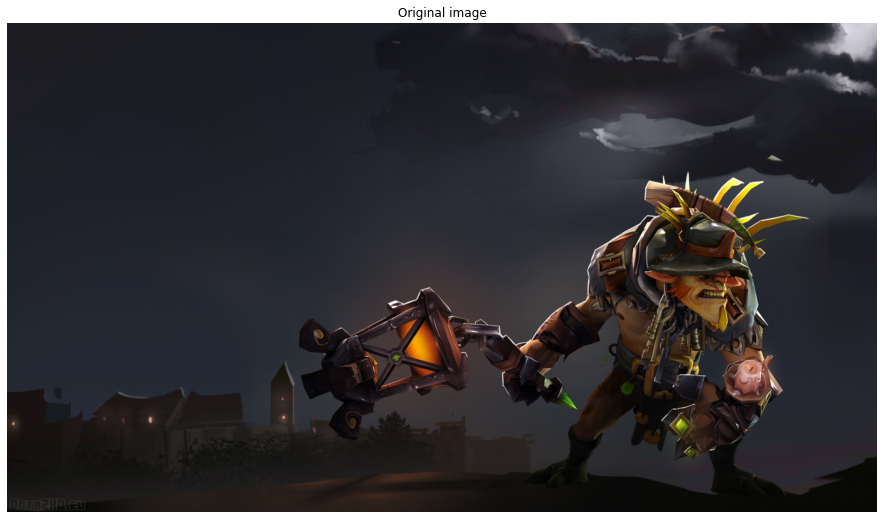

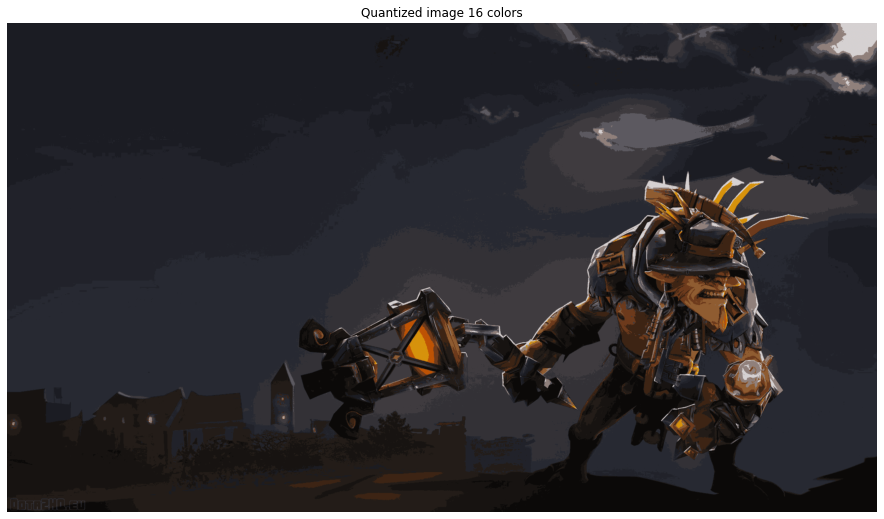

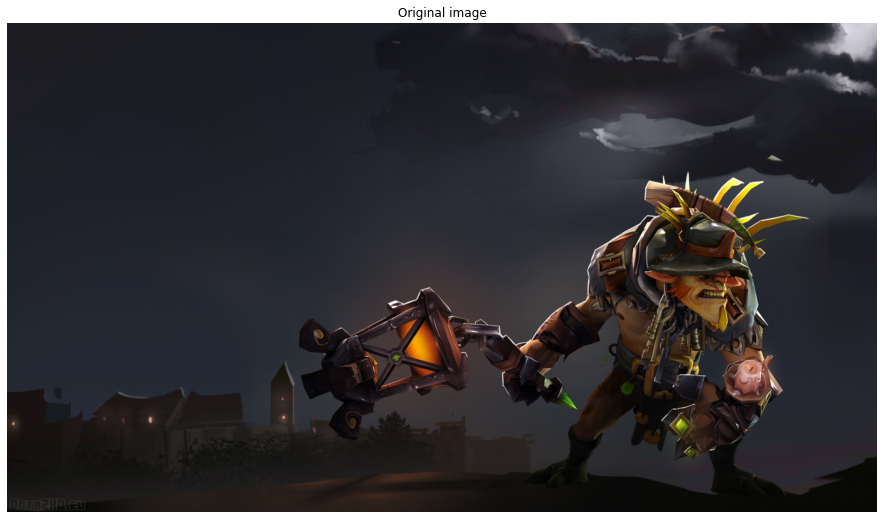

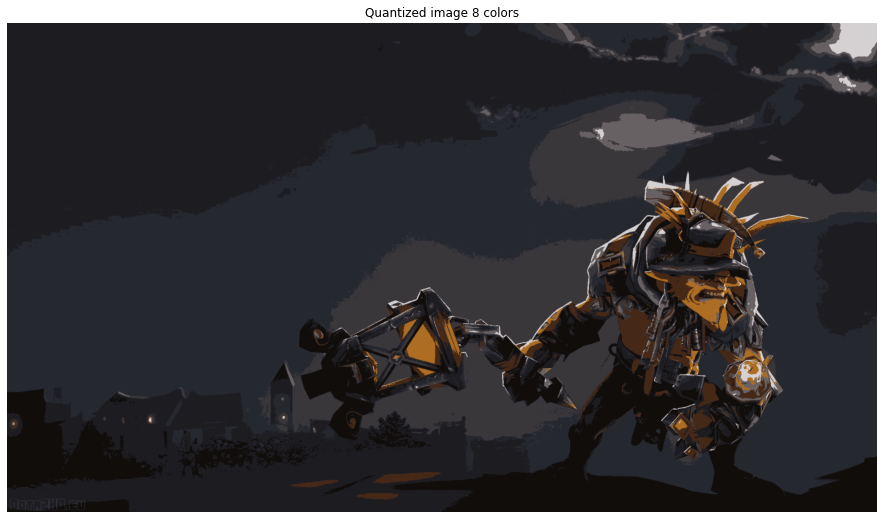

In [13]:
for model in models:
    plt.figure(figsize=(16,9))
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(brist)
    labels = model.predict(image_array)
    plt.figure(figsize=(16,9))
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image {model.get_params().get("n_clusters")} colors')
    plt.imshow(recreate_image(model.cluster_centers_, labels, w, h))
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.utils import shuffle

In [15]:
num_points = 1200

mean1 = [-1, -3]
cov1 = [[2, 2], [2, 5]]
x1 = np.random.multivariate_normal(mean1, cov1, num_points)

mean2 = [4, 5]
cov2 = [[7, -2], [-2, 3]]
x2 = np.random.multivariate_normal(mean2, cov2, num_points)

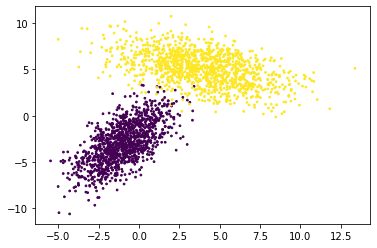

In [16]:
X = np.concatenate([x1, x2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)
plt.show()

In [17]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('weights_ ')
print(GMM.weights_)
print('covariances_ ')
print(GMM.covariances_)
print('means_ ')
print(GMM.means_)

weights_ 
[0.49952903 0.50047097]
covariances_ 
[[[ 7.04519611 -2.23196774]
  [-2.23196774  3.14589548]]

 [[ 2.16397411  2.11535984]
  [ 2.11535984  4.97632856]]]
means_ 
[[ 3.91619181  5.07593581]
 [-0.97410753 -2.95542296]]


mean1 = [-1, -3], mean2 = [4, 5], cov1 = [[2, 2], [2, 5]], cov2 = [[7, -2], [-2, 3]]

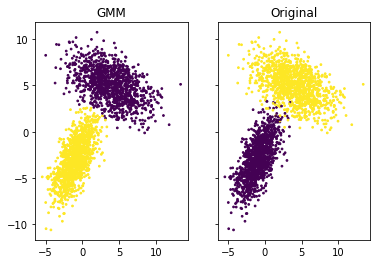

In [18]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

plt.show()

In [19]:
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
dataset = pd.read_csv('tripadvisor_hotel_reviews.csv')
dataset['Rating'].replace(1, 'bad score',inplace=True)
dataset['Rating'].replace(2, 'bad score',inplace=True)
dataset['Rating'].replace(3, 'good score',inplace=True)
dataset['Rating'].replace(4, 'good score',inplace=True)
dataset['Rating'].replace(5, 'good score',inplace=True)

In [21]:
print(dataset)

                                                  Review      Rating
0      Nice hotel expensive parking got good deal sta...  good score
1      ok nothing special charge diamond member hilto...   bad score
2      nice rooms not 4* experience hotel monaco seat...  good score
3      unique, great stay, wonderful time hotel monac...  good score
4      great stay great stay, went seahawk game aweso...  good score
...                                                  ...         ...
20486  best kept secret 3rd time staying charm, not 5...  good score
20487  great location price view hotel great quick pl...  good score
20488  ok just looks nice modern outside, desk staff ...   bad score
20489  hotel theft ruined vacation hotel opened sept ...   bad score
20490  people talking, ca n't believe excellent ratin...   bad score

[20491 rows x 2 columns]


In [22]:
dataset['Review'] = dataset['Review'].str.lower()
dataset['Review'] = dataset['Review'].str.strip()

In [23]:
print(dataset)

                                                  Review      Rating
0      nice hotel expensive parking got good deal sta...  good score
1      ok nothing special charge diamond member hilto...   bad score
2      nice rooms not 4* experience hotel monaco seat...  good score
3      unique, great stay, wonderful time hotel monac...  good score
4      great stay great stay, went seahawk game aweso...  good score
...                                                  ...         ...
20486  best kept secret 3rd time staying charm, not 5...  good score
20487  great location price view hotel great quick pl...  good score
20488  ok just looks nice modern outside, desk staff ...   bad score
20489  hotel theft ruined vacation hotel opened sept ...   bad score
20490  people talking, ca n't believe excellent ratin...   bad score

[20491 rows x 2 columns]


In [24]:
stop_words = stopwords.words('english')

In [25]:
dataset['Review'] = dataset['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [26]:
table = str.maketrans('', '', string.punctuation)
dataset['Review'] = dataset['Review'].str.translate(table)

In [27]:
print(dataset)

                                                  Review      Rating
0      nice hotel expensive parking got good deal sta...  good score
1      ok nothing special charge diamond member hilto...   bad score
2      nice rooms 4 experience hotel monaco seattle g...  good score
3      unique great stay wonderful time hotel monaco ...  good score
4      great stay great stay went seahawk game awesom...  good score
...                                                  ...         ...
20486  best kept secret 3rd time staying charm 5star ...  good score
20487  great location price view hotel great quick pl...  good score
20488  ok looks nice modern outside desk staff nt par...   bad score
20489  hotel theft ruined vacation hotel opened sept ...   bad score
20490  people talking ca nt believe excellent ratings...   bad score

[20491 rows x 2 columns]


In [28]:
def WC(text):
    wordcloud = WordCloud(width = 1500,height = 700,).generate(str(text))
    fig = plt.figure(figsize = (40, 30))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

WordCloud відгуків з рейтингом 1-2

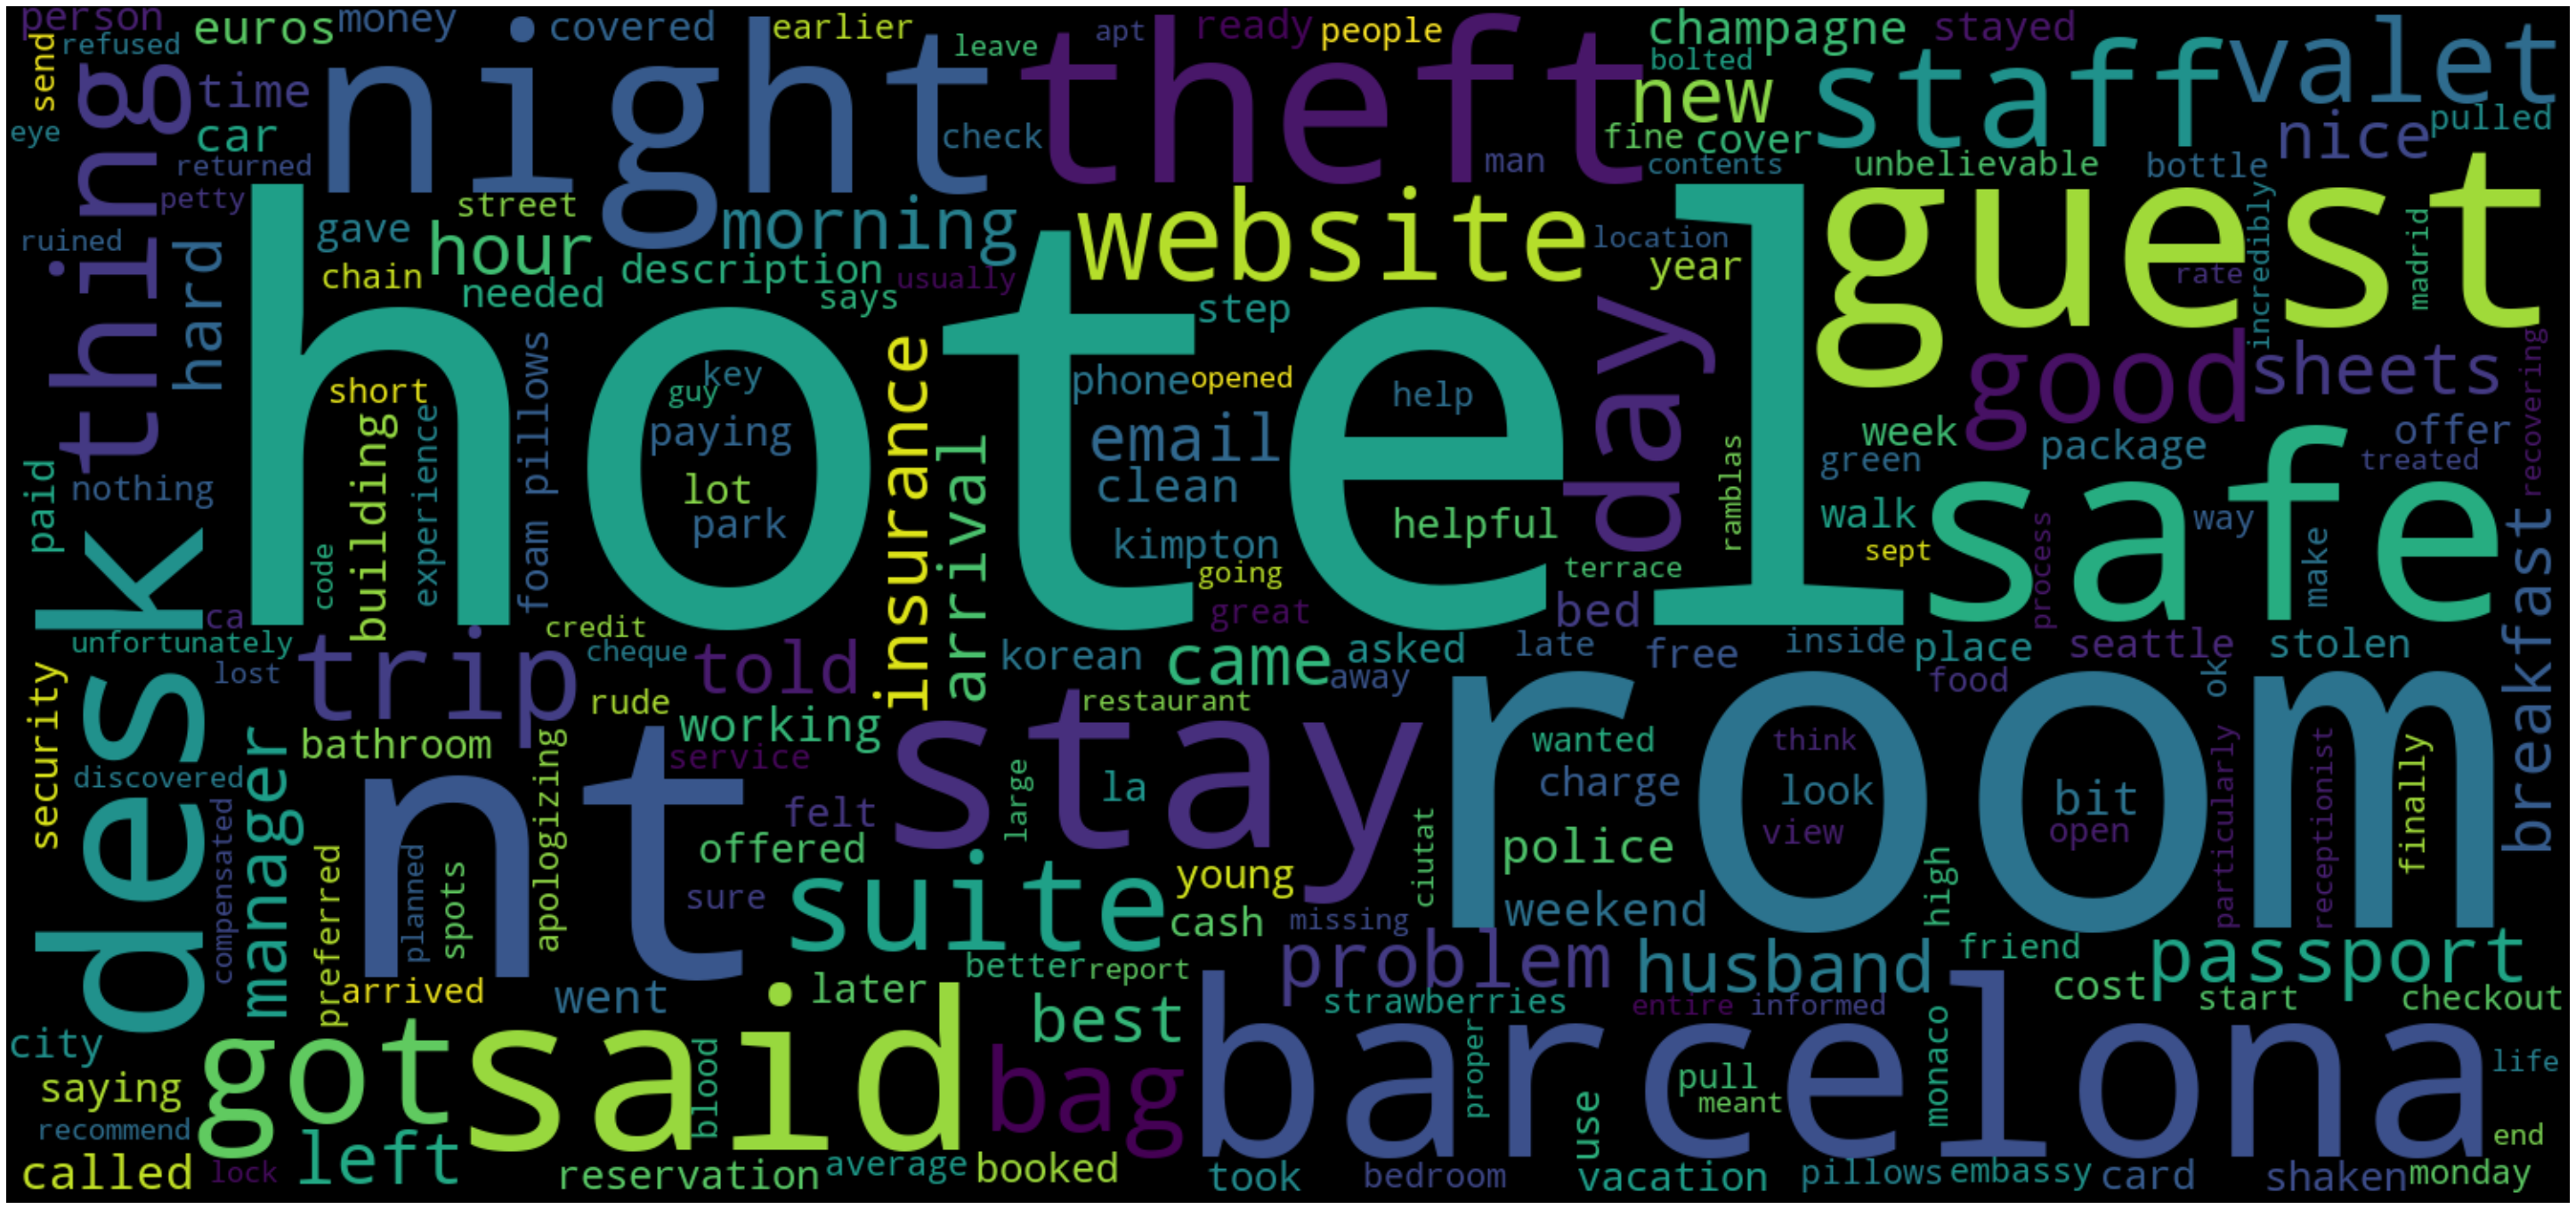

In [29]:
WC(dataset[dataset['Rating']=='bad score'].Review.values)

WordCloud відгуків з рейтингом 3-5

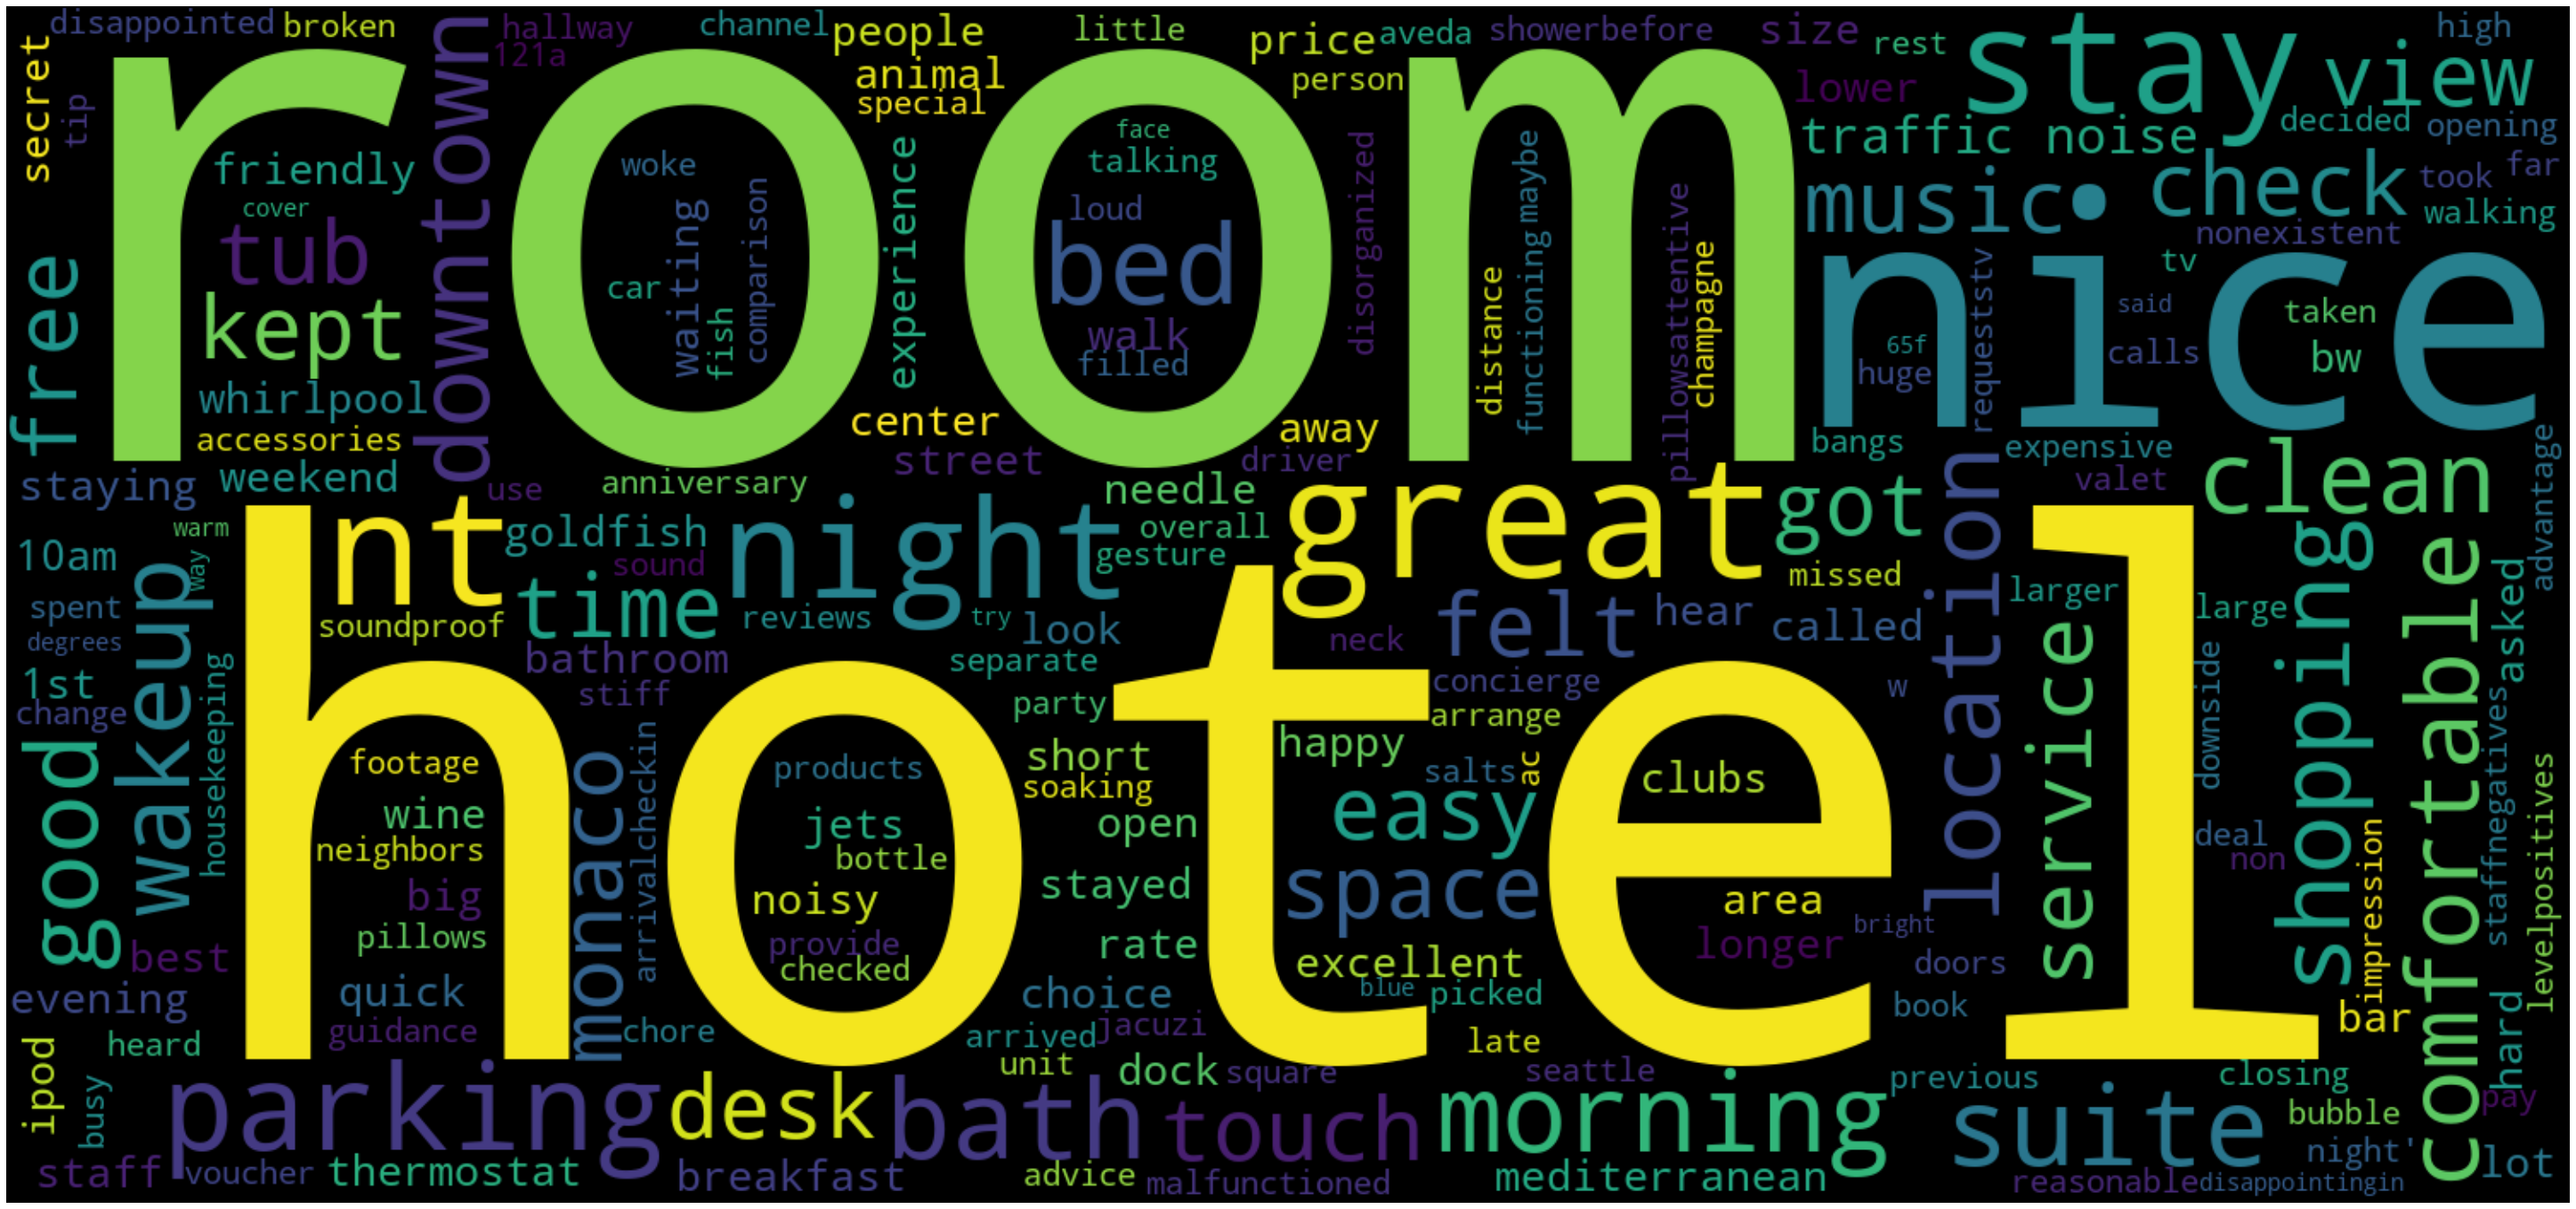

In [30]:
WC(dataset[dataset['Rating']=='good score'].Review.values)

In [31]:
X = TfidfVectorizer(max_features=8000).fit_transform(dataset['Review'])
y = dataset['Rating']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.9, random_state = 1)
CART = DecisionTreeClassifier()
CART = CART.fit(X_train,y_train)
y_pred = CART.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   bad score       0.59      0.55      0.57       321
  good score       0.92      0.93      0.92      1729

    accuracy                           0.87      2050
   macro avg       0.76      0.74      0.75      2050
weighted avg       0.87      0.87      0.87      2050



In [33]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

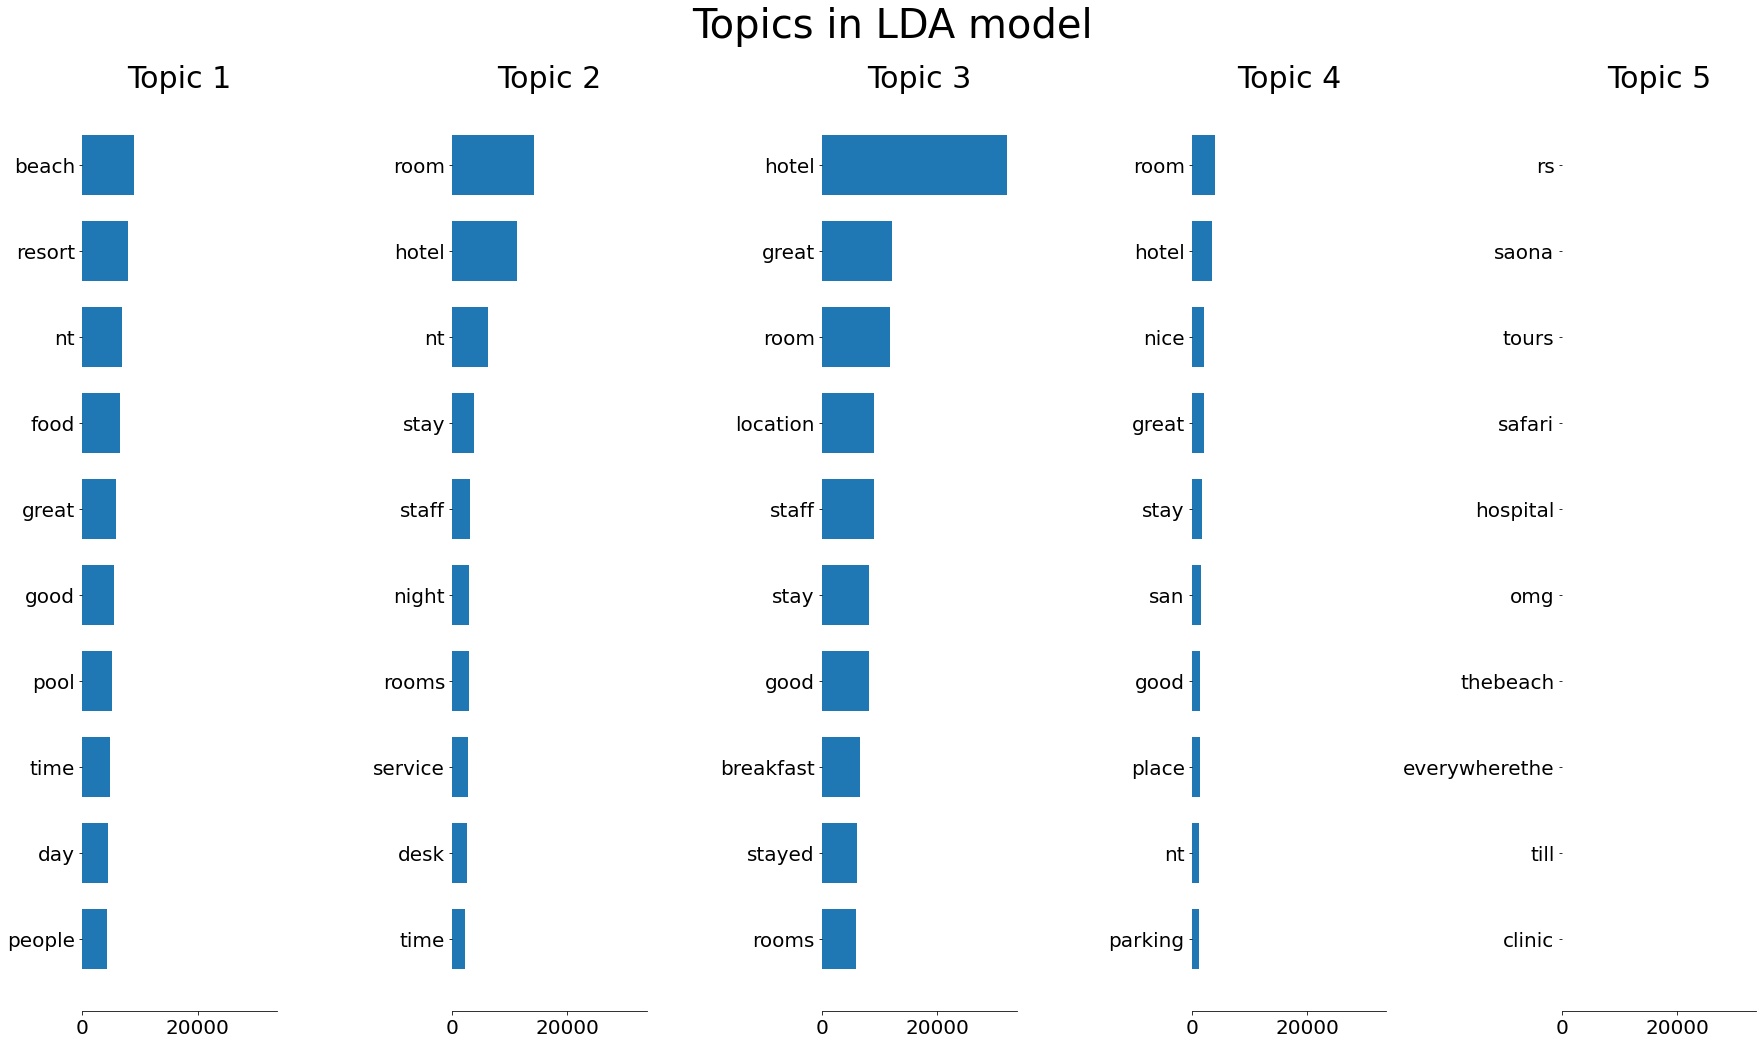

In [35]:
n_components = 5
n_top_words = 10
vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(dataset['Review'])
lda = LatentDirichletAllocation(n_components=n_components, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names, n_top_words, 'Topics in LDA model')